In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import csv
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/introml/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/introml


In [ ]:
def load_data(fn):
    houses = pd.read_csv(fn)
    return houses

data = load_data('train.csv')
#test = load_data('test.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data["Alley"].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

# Visualizing data

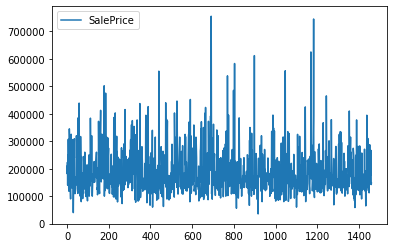

In [ ]:
sale_prices = pd.DataFrame(data["SalePrice"].copy())
sale_prices.plot.line()

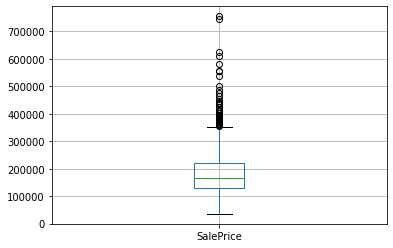

In [ ]:
sale_prices.boxplot()

We can see from these graphs that the average house price sits around 200,000 but there are outliers exceeding 700,000.

Remove columns with many NaNs

In [ ]:
def remove_cols(tbl, names):
    for name in names:
        tbl = tbl.drop(name, axis=1)
    return tbl

data = remove_cols(data, ["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"])
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


Remove more columns which seem to have low information, and non-numeric columns.

In [ ]:
data = data.replace("1Story", 1).replace("2Story", 2)
data = data.select_dtypes(include=np.number)
data = remove_cols(data, ["ScreenPorch", "PoolArea", "3SsnPorch", "MiscVal", "MasVnrArea", "BsmtFinSF2", "2ndFlrSF", "LowQualFinSF", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch"])
data = data.dropna()

data


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,706,150,856,856,1710,1,0,2,1,3,1,8,0,2003.0,2,548,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,978,284,1262,1262,1262,0,1,2,0,3,1,6,1,1976.0,2,460,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,486,434,920,920,1786,1,0,2,1,3,1,6,1,2001.0,2,608,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,216,540,756,961,1717,1,0,1,0,3,1,7,1,1998.0,3,642,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,655,490,1145,1145,2198,1,0,2,1,4,1,9,1,2000.0,3,836,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0,953,953,953,1647,0,0,2,1,3,1,7,1,1999.0,2,460,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,790,589,1542,2073,2073,1,0,2,0,3,1,7,2,1978.0,2,500,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,275,877,1152,1188,2340,0,0,2,0,4,1,9,2,1941.0,1,252,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,49,0,1078,1078,1078,1,0,1,0,2,1,5,0,1950.0,1,240,4,2010,142125


In [ ]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,SalePrice
count,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,728.352263,56.113576,70.683230,10120.070098,6.220053,5.559006,1972.440106,1985.788820,439.729370,594.275067,1078.356699,1174.341615,1531.812777,0.415262,0.055013,1.582076,0.383319,2.861579,1.042591,6.573203,0.602484,1978.543035,1.880213,503.465839,6.348713,2007.795031,185827.104703
std,420.432826,41.746693,24.261598,8110.632788,1.383558,1.066120,30.978187,21.020073,469.047346,450.144102,445.692845,386.305987,522.979768,0.512419,0.231968,0.549631,0.499028,0.772764,0.206372,1.589740,0.632114,25.828916,0.653471,191.050853,2.693317,1.333292,83212.656225
min,1.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,438.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,1.000000,2006.000000,35311.000000
25%,367.000000,20.000000,60.000000,7593.000000,5.000000,5.000000,1953.000000,1967.000000,0.000000,250.500000,804.000000,894.000000,1158.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,360.000000,5.000000,2007.000000,131200.000000
50%,728.000000,50.000000,70.000000,9430.000000,6.000000,5.000000,1975.000000,1995.000000,375.000000,506.000000,1008.000000,1098.000000,1479.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1981.000000,2.000000,484.000000,6.000000,2008.000000,165000.000000
75%,1091.500000,70.000000,80.000000,11361.500000,7.000000,6.000000,2003.000000,2005.000000,705.500000,840.000000,1330.500000,1411.500000,1776.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,600.000000,8.000000,2009.000000,219500.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,2336.000000,6110.000000,4692.000000,5642.000000,2.000000,2.000000,3.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1418.000000,12.000000,2010.000000,755000.000000


Separate inputs from labels, and split into train and test sets.

In [ ]:
y = data["SalePrice"].copy()
x = data.drop("SalePrice", axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y)

In [ ]:
X_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold
230,231,20,73.0,8760,6,6,1959,1959,0,1194,1194,1194,1194,1,0,1,0,3,1,6,0,1959.0,1,312,4,2010
957,958,20,70.0,7420,5,5,1962,1962,417,640,1057,1057,1057,0,0,1,0,3,1,6,0,1977.0,2,576,4,2007
1409,1410,60,46.0,20544,7,6,1986,1991,0,791,791,1236,2093,0,0,2,1,3,1,7,1,1986.0,2,542,11,2008
167,168,60,86.0,10562,8,5,2007,2007,1288,294,1582,1610,2161,1,0,1,1,3,1,8,1,2007.0,3,789,11,2007
728,729,90,85.0,11475,5,5,1958,1958,0,1584,1584,1776,1776,1,0,2,0,4,2,9,0,1968.0,3,888,7,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,902,20,64.0,8712,5,7,1957,2000,860,132,992,1306,1306,1,0,1,0,2,1,5,0,1968.0,1,756,5,2009
59,60,20,60.0,7200,5,7,1972,1972,632,148,780,780,780,0,0,1,0,2,1,4,0,1973.0,1,352,1,2008
793,794,20,76.0,9158,8,5,2007,2007,0,1496,1496,1496,1496,0,0,2,0,3,1,7,0,2007.0,2,474,6,2007
675,676,160,24.0,2289,6,6,1978,1978,311,544,855,855,1441,0,0,2,1,3,1,7,1,1978.0,2,440,4,2009


In [ ]:
X_train.corrwith(y_train)

Id             -0.067422
MSSubClass     -0.086770
LotFrontage     0.359897
LotArea         0.306623
OverallQual     0.801123
OverallCond    -0.129657
YearBuilt       0.515058
YearRemodAdd    0.513039
BsmtFinSF1      0.392980
BsmtUnfSF       0.227075
TotalBsmtSF     0.633003
1stFlrSF        0.614277
GrLivArea       0.723844
BsmtFullBath    0.213553
BsmtHalfBath   -0.052803
FullBath        0.554530
HalfBath        0.288625
BedroomAbvGr    0.155051
KitchenAbvGr   -0.155141
TotRmsAbvGrd    0.555338
Fireplaces      0.451462
GarageYrBlt     0.502676
GarageCars      0.639677
GarageArea      0.623914
MoSold          0.072753
YrSold         -0.028563
dtype: float64

# Logistic Regression

Perform logistic regression, testing feature transformation techniques and ridge regression.

In [ ]:
reg_pipe_standard = make_pipeline(preprocessing.StandardScaler(), LogisticRegression(max_iter=5000))
reg_pipe_minmax = make_pipeline(preprocessing.MinMaxScaler(), LogisticRegression(max_iter=5000))

reg_pipe_standard.fit(X_train, y_train)
reg_pipe_minmax.fit(X_train, y_train)

ridge_reg_std_1 = make_pipeline(preprocessing.StandardScaler(), Ridge(alpha=0.01))
ridge_reg_std_1.fit(X_train, y_train)

ridge_reg_minmax_1 = make_pipeline(preprocessing.MinMaxScaler(), Ridge(alpha=0.01))
ridge_reg_minmax_1.fit(X_train, y_train)

ridge_reg_std_2 = make_pipeline(preprocessing.StandardScaler(), Ridge(alpha=1))
ridge_reg_std_2.fit(X_train, y_train)

ridge_reg_minmax_2 = make_pipeline(preprocessing.MinMaxScaler(), Ridge(alpha=1))
ridge_reg_minmax_2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('ridge',
                 Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solver='auto',
                       tol=0.001))],
         verbose=False)

In [ ]:
reg_train_std_pred = reg_pipe_standard.predict(X_train)
reg_train_std_mse = mean_squared_error(y_train, reg_train_std_pred)

reg_test_std_pred = reg_pipe_standard.predict(X_test)
reg_test_std_mse = mean_squared_error(y_test, reg_test_std_pred)

reg_train_minmax_pred = reg_pipe_minmax.predict(X_train)
reg_train_minmax_mse = mean_squared_error(y_train, reg_train_minmax_pred)

reg_test_minmax_pred = reg_pipe_minmax.predict(X_test)
reg_test_minmax_mse = mean_squared_error(y_test, reg_test_minmax_pred)

ridge1_train_std_pred = ridge_reg_std_1.predict(X_train)
ridge1_train_std_mse = mean_squared_error(y_train, ridge1_train_std_pred)

ridge1_test_std_pred = ridge_reg_std_1.predict(X_test)
ridge1_test_std_mse = mean_squared_error(y_test, ridge1_test_std_pred)

ridge1_train_minmax_pred = ridge_reg_minmax_1.predict(X_train)
ridge1_train_minmax_mse = mean_squared_error(y_train, ridge1_train_minmax_pred)

ridge1_test_minmax_pred = ridge_reg_minmax_1.predict(X_test)
ridge1_test_minmax_mse = mean_squared_error(y_test, ridge1_test_minmax_pred)

ridge2_train_std_pred = ridge_reg_std_2.predict(X_train)
ridge2_train_std_mse = mean_squared_error(y_train, ridge2_train_std_pred)

ridge2_test_std_pred = ridge_reg_std_2.predict(X_test)
ridge2_test_std_mse = mean_squared_error(y_test, ridge2_test_std_pred)

ridge2_train_minmax_pred = ridge_reg_minmax_2.predict(X_train)
ridge2_train_minmax_mse = mean_squared_error(y_train, ridge2_train_minmax_pred)

ridge2_test_minmax_pred = ridge_reg_minmax_2.predict(X_test)
ridge2_test_minmax_mse = mean_squared_error(y_test, ridge2_test_minmax_pred)

In [ ]:
round_ = lambda x: round(np.sqrt(x), 2)

train_mse = map(round_, [reg_train_std_mse, reg_train_minmax_mse, ridge1_train_std_mse, ridge1_train_minmax_mse, ridge2_train_std_mse, ridge2_train_minmax_mse])
test_mse = map(round_, [reg_test_std_mse, reg_test_minmax_mse, ridge1_test_std_mse, ridge1_test_minmax_mse, ridge2_test_std_mse, ridge2_test_minmax_mse])

scores = {
    "Algo": ["LogReg", "LogReg", "Ridge", "Ridge", "Ridge", "Ridge"],
    "Transformation": ["StandardScaler", "MinMaxScaler", "StandardScaler", "MinMaxScaler", "StandardScaler", "MinMaxScaler"],
    "Alpha": ["N/A", "N/A", "0.01", "0.01", "0.1", "0.1"],
    "Train RMSE": train_mse,
    "Test RMSE": test_mse,
}
scores_df = pd.DataFrame(scores)
scores_df

,Algo,Transformation,Alpha,Train RMSE,Test RMSE
0,LogReg,StandardScaler,N/A,13453.41,52697.34
1,LogReg,MinMaxScaler,N/A,59848.81,69646.98
2,Ridge,StandardScaler,0.01,32348.58,53090.67
3,Ridge,MinMaxScaler,0.01,32348.70,53054.91
4,Ridge,StandardScaler,0.1,32348.84,53047.04
5,Ridge,MinMaxScaler,0.1,32757.51,51135.92


# SVM

# SVM

Use GridSearch to find parameters for SVM

In [ ]:
svm_clf = GridSearchCV(SVC(), {"kernel": ("linear", "poly", "rbf"), "C": [1,5,10]}, scoring="neg_root_mean_squared_error")

svc_pipe = make_pipeline(preprocessing.StandardScaler(), svm_clf)
svc_pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gridsearchcv',
                 GridSearchCV(cv=None, error_score=nan,
                              estimator=SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False),
                              iid='deprecated', n_jobs=None,
                              param_grid={'C': [1, 5, 10],
                           

In [ ]:
svc_pred = svc_pipe.predict(X_test)
svc_mse = mean_squared_error(y_test, svc_pred)

svm_results = pd.DataFrame(svc_pipe.steps[1][1].cv_results_)[['param_C','param_kernel','mean_test_score']]
svm_results['mean_test_score'] = -svm_results['mean_test_score']
svm_results

,param_C,param_kernel,mean_test_score
0,1,linear,39840.070462
1,1,poly,64095.892419
2,1,rbf,63357.569956
3,5,linear,39847.560374
4,5,poly,45680.937634
5,5,rbf,44780.844998
6,10,linear,39847.560374
7,10,poly,39898.903398
8,10,rbf,44916.430972


In [ ]:
print(svc_pipe.predict(X_test[:5]))
print(y_test[:5])

[119000 147000 100000 252000 109008]
586     130000
92      163500
1212    113000
1374    250000
594     110000
Name: SalePrice, dtype: int64


# Neural Network

Multi-Layer Perceptron

In [ ]:
mlp_clf1 = MLPClassifier(hidden_layer_sizes=(6,6), activation='relu', max_iter=1000, alpha=0.0001)
mlp_clf2 = MLPClassifier(hidden_layer_sizes=(6,6), activation='relu', max_iter=1000, alpha=0.001)
mlp_clf3 = MLPClassifier(hidden_layer_sizes=(6,6), activation='relu', max_iter=1000, alpha=0.01)

mlp_pipe = make_pipeline(preprocessing.StandardScaler(), mlp_clf1)
mlp_pipe.fit(X_train, y_train)

mlp_pipe2 = make_pipeline(preprocessing.StandardScaler(), mlp_clf2)
mlp_pipe2.fit(X_train, y_train)

mlp_pipe3 = make_pipeline(preprocessing.StandardScaler(), mlp_clf3)
mlp_pipe3.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpclassifier',
                 MLPClassifier(activation='relu', alpha=0.01, batch_size='auto',
                               beta_1=0.9, beta_2=0.999, early_stopping=False,
                               epsilon=1e-08, hidden_layer_sizes=(6, 6),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=1000, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False)

In [ ]:
mlp_pred_train = mlp_pipe.predict(X_train)
mlp_mse_train = mean_squared_error(y_train, mlp_pred_train)

mlp_pred_test = mlp_pipe.predict(X_test)
mlp_mse_test = mean_squared_error(y_test, mlp_pred_test)

mlp_pred2_train = mlp_pipe2.predict(X_train)
mlp_mse2_train = mean_squared_error(y_train, mlp_pred2_train)

mlp_pred2_test = mlp_pipe2.predict(X_test)
mlp_mse2_test = mean_squared_error(y_test, mlp_pred2_test)

mlp_pred3_train = mlp_pipe3.predict(X_train)
mlp_mse3_train = mean_squared_error(y_train, mlp_pred3_train)

mlp_pred3_test = mlp_pipe3.predict(X_test)
mlp_mse3_test = mean_squared_error(y_test, mlp_pred3_test)

In [ ]:
mlp_train_rmse = map(round_, [mlp_mse_train, mlp_mse2_train, mlp_mse3_train])
mlp_test_rmse = map(round_, [mlp_mse_test, mlp_mse2_test, mlp_mse3_test])

mlp_scores = {
    "Algo": ["MLP", "MLP", "MLP"],
    "Alpha": ["0.0001", "0.001", "0.01"],
    "Train RMSE": mlp_train_rmse,
    "Test RMSE": mlp_test_rmse,
}
mlp_scores_df = pd.DataFrame(mlp_scores)
mlp_scores_df

,Algo,Alpha,Train RMSE,Test RMSE
0,MLP,0.0001,46452.13,72805.58
1,MLP,0.001,30972.09,64610.52
2,MLP,0.01,32739.34,59847.55
